# Fully Quantum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Text(0.5, 1.0, 'Sqrt(X dag X)')

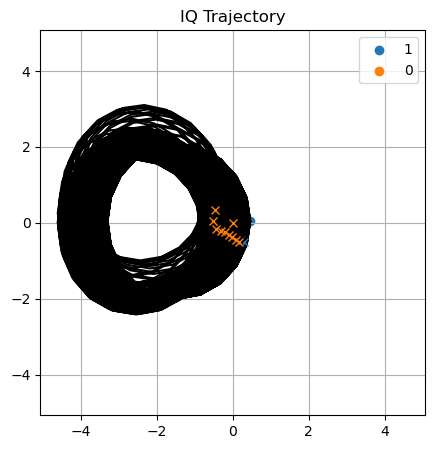

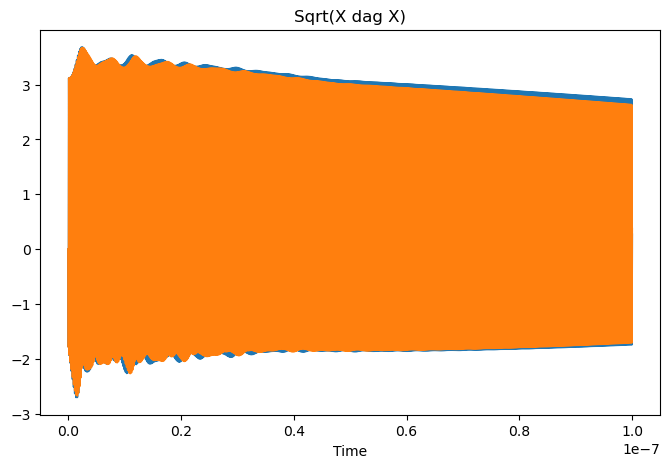

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def SNAIL_drive(m, w_s, w_1, w_2, epsilon_1, epsilon_2, phi_1, phi_2, kappa, g3, g4, amp_on):

    Ns = 36

    s  = destroy(Ns)

    tlist = np.linspace(0,1e-7,10000)

    H0 = w_s * s.dag() * s + g3*(s.dag()*s.dag()*s + s.dag()*s*s) + g4*s.dag()*s.dag()*s*s

    H1_I = s # quadratures of the drive

    H1_Q = s.dag()

    drive = epsilon_1*np.exp(1j*w_1*tlist + 1j*phi_1)*amp_on + epsilon_2*np.exp(1j*w_2*tlist + 1j*phi_2)

    H = [[H0, tlist*0 + 1],[H1_I,drive],[H1_Q,np.conj(drive)]]

    c_op_list = []

    c_op_list.append(np.sqrt(kappa) * s)

    psi_0 = coherent(Ns,0)

    output1 = mesolve(H, psi_0, tlist, c_ops = c_op_list, e_ops = [(s.dag() + s)/2, 1j*(s.dag() - s)/2, s.dag()*s])

    x = output1.expect[0]*np.sqrt(2 / (m*w_s))
    p = output1.expect[1]*np.sqrt(2*m*w_s)
    
    I = output1.expect[0]
    Q = output1.expect[1]
    
    traj = I + 1j*Q
    
    return tlist, traj, I, Q, x, p

epsilon_1 = 10e6 * 2 * np.pi
epsilon_2 = 10e9 * 2 * np.pi 
w_s  = 2 * np.pi * 5e9 
w_1 = 2 * np.pi * 5.00e9
w_2 = 2 * np.pi * 10.0e9 
phi_1 = 0*np.pi/2 # phase
phi_2 = 0*np.pi/2 # phase
kappa = 10e6 * 2 * np.pi           # cavity dissipation rate
m=0.0000000001  # just a value that keeps the sim stable, doesn't affect the quadratures
g3 = 20e6 * 2 * np.pi
g4 = 0e6 * 2 * np.pi


tlist, traj1, I1, Q1, x1, p1 = SNAIL_drive(m, w_s, w_1, w_2, epsilon_1, epsilon_2, phi_1, phi_2, kappa, g3, g4, 0)
tlist, traj2, I2, Q2, x2, p2 = SNAIL_drive(m, w_s, w_1, w_2, epsilon_1, epsilon_2, phi_1, phi_2, kappa, g3, g4, 1)

fig, ax = plt.subplots(figsize=(8,5))

w_demod = w_1

demod1 = (traj1*np.exp(1j*w_demod*tlist))
demod2 = (traj2*np.exp(1j*w_demod*tlist))

limits = np.max(np.abs(demod2))*1.1

ax.plot(np.real(demod2), np.imag(demod2),'k')
ax.plot(np.real(demod2[0:-1:1000]), np.imag(demod2)[0:-1:1000],'x')
ax.scatter(np.real(demod2[-1]), np.imag(demod2[-1]), label="1")
ax.plot(np.real(demod1), np.imag(demod1),'k')
ax.plot(np.real(demod1[0:-1:1000]), np.imag(demod1)[0:-1:1000],'x')
ax.scatter(np.real(demod1[-1]), np.imag(demod1[-1]), label="0")
ax.legend()
ax.set_title('IQ Trajectory')
ax.set_xlim([-limits,limits])
ax.set_ylim([-limits,limits])
ax.set_aspect('equal')
ax.grid()

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, x1)
ax.plot(tlist, x2)
ax.set_xlabel('Time')
ax.set_title('Sqrt(X dag X)')


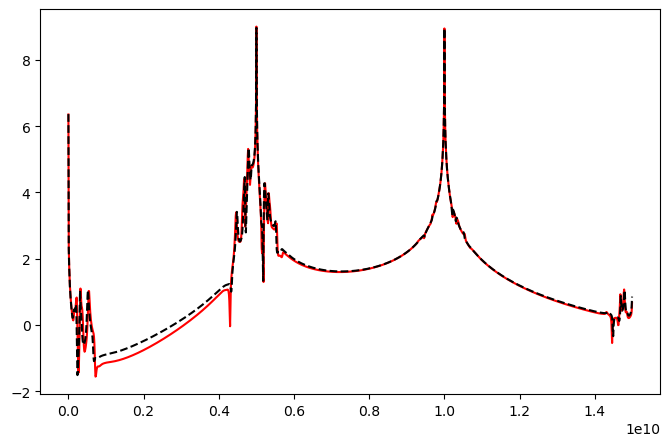

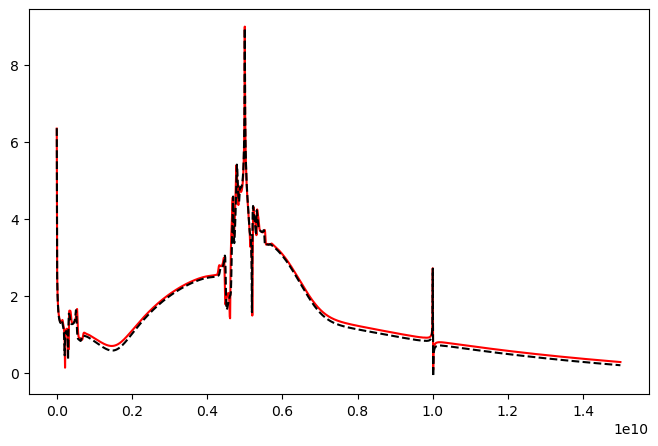

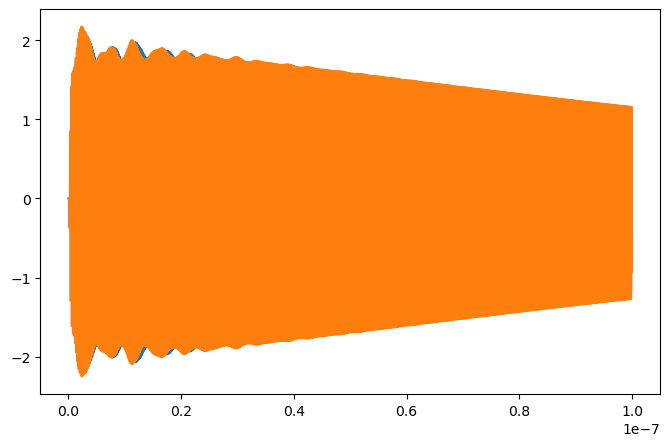

In [218]:
sos = signal.butter(12, 6e9, 'lp', fs=len(tlist)/tlist[-1], output='sos')

idx = 1500

fft_x1 = np.fft.fft(x1)
fft_x2 = np.fft.fft(x2)

x1_filtered = signal.sosfilt(sos, x1)
x2_filtered = signal.sosfilt(sos, x2)

fft_x1_filtered = np.fft.fft(x1_filtered)
fft_x2_filtered = np.fft.fft(x2_filtered)

fig, ax = plt.subplots(figsize=(8,5))

plt.plot(freq[0:idx], np.log(np.abs(fft_x1[0:idx])),'r')
plt.plot(freq[0:idx], np.log(np.abs(fft_x2[0:idx])),'k--')

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(freq[0:idx], np.log(np.abs(fft_x1_filtered[0:idx])),'r')
plt.plot(freq[0:idx], np.log(np.abs(fft_x2_filtered[0:idx])),'k--')

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(tlist[0:10000], x2_filtered[0:10000])
plt.plot(tlist[0:10000], x1_filtered[0:10000])



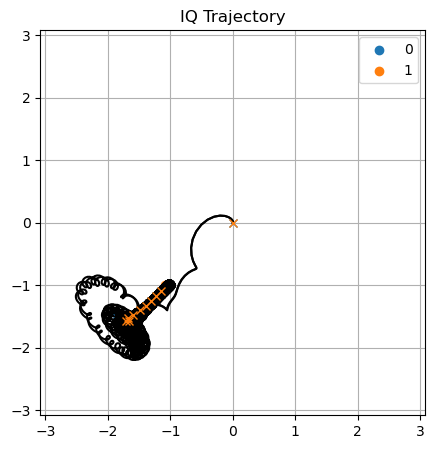

In [219]:
traj1_filtered = signal.sosfilt(sos, traj1)
traj2_filtered = signal.sosfilt(sos, traj2)

fig, ax = plt.subplots(figsize=(8,5))

w_demod = w_1

demod1 = (traj1_filtered*np.exp(1j*w_demod*tlist))
demod2 = (traj2_filtered*np.exp(1j*w_demod*tlist))

limits = np.max(np.abs(demod2))*1.1

ax.plot(np.real(demod1), np.imag(demod1),'k')
ax.plot(np.real(demod1[0:-1:1000]), np.imag(demod1)[0:-1:1000],'x')
ax.scatter(np.real(demod1[-1]), np.imag(demod1[-1]), label="0")
ax.plot(np.real(demod2), np.imag(demod2),'k')
ax.plot(np.real(demod2[0:-1:1000]), np.imag(demod2)[0:-1:1000],'x')
ax.scatter(np.real(demod2[-1]), np.imag(demod2[-1]), label="1")
ax.legend()
ax.set_title('IQ Trajectory')
ax.set_xlim([-limits,limits])
ax.set_ylim([-limits,limits])
ax.set_aspect('equal')
ax.grid()

# Fully Classical

Text(0.5, 0, 'Time')

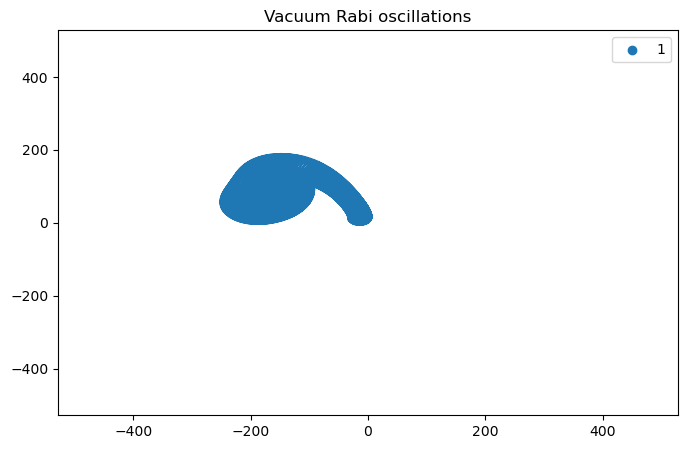

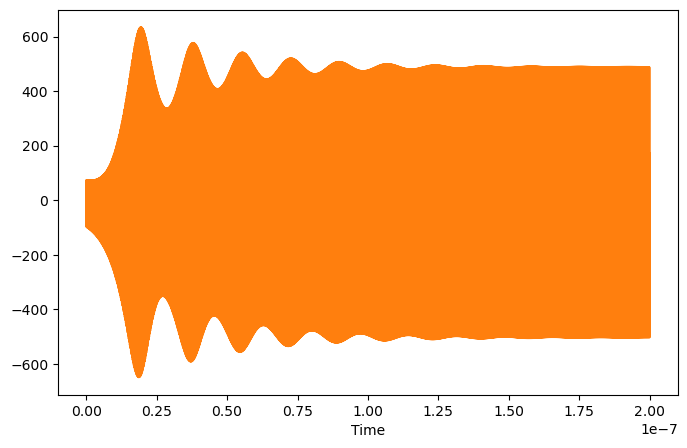

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
import time
from numba import njit
from numba.typed import List

@njit
def RK_loop(t, x, f_dxdt, dt, args):

    '''
    Implements an RK4 method.
    '''

    for i in range(0, len(t)-1):#

        k1 = f_dxdt(x[i,:], t[i], args)
        k2 = f_dxdt(x[i,:] + k1*dt/2, t[i] + dt/2, args) 
        k3 = f_dxdt(x[i,:] + k2*dt/2, t[i] + dt/2, args) 
        k4 = f_dxdt(x[i,:] + k3*dt, t[i] + dt, args) 
        
        x[i+1,:] = x[i,:] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

    return x

@njit
def f_dxdt(xi, t, args):
    
    m = args[0]
    w_s = args[1]
    w_1 = args[2]
    w_2 = args[3]
    epsilon_1 = args[4]
    epsilon_2 = args[5]
    phi_1 = args[6]
    phi_2 = args[7]
    kappa = args[8]
    g3 = args[9]
    g4 = args[10]
    amp_on = args[11]

    xx = xi[0]
    p = xi[1]

    dxxdt = p/m - 2/np.sqrt(2*m*w_s)*(amp_on*epsilon_1*np.sin(w_1*t) + epsilon_2*np.sin(w_2*t+phi_2) )+ g3/np.sqrt(2*m*w_s)*p*xx
    dpdt = -m*w_s**2*xx - 2/np.sqrt(2*m*w_s)*m*w_s*(amp_on*epsilon_1*np.cos(w_1*t) + epsilon_2*np.cos(w_2*t+phi_2) ) - kappa*p -3*g3/np.sqrt(2*m*w_s)*(xx*m*w_s)**2
    
    dxdt = np.array([dxxdt, dpdt])

    return dxdt

def classical_cav_drive_i(args):
    '''
    Wrapper for the RK loop that creates all the necessary arrays, since
    you can't create arrays inside of a jit function.
    '''
    
    t = np.linspace(0,2e-7,200000)
    
    N = 2
    
    x0 = np.zeros(2)
    
    x = np.zeros([len(t),N])
    
    dt = t[1] - t[0]
    
    x[0,:] = x0

    result = RK_loop(t, x, f_dxdt, dt, args)
    
    x = result[:,0]
    p = result[:,1]
    
    I = x*np.sqrt(m*w_c/2)
    Q = p/np.sqrt(2*w_c*m)

    traj = I + 1j*Q
    
    return t, traj, I, Q, x, p

def classical_cav_drive(m, w_s, w_1, w_2, epsilon_1, epsilon_2, phi_1, phi_2, kappa, g3, g4, amp_on):
    
    args_list = [m, w_s, w_1, w_2, epsilon_1, epsilon_2, phi_1, phi_2, kappa, g3, g4, amp_on]

    args = List()
    [args.append(arg) for arg in args_list]

    t, traj, I, Q, x, p = classical_cav_drive_i(args)
    
    return t, traj, I, Q, x, p

epsilon_1 = 10e6 * 2 * np.pi
epsilon_2 = 100e9 * 2 * np.pi 
w_s  = 2 * np.pi * 5e9 
w_1 = 2 * np.pi * 5.00e9
w_2 = 2 * np.pi * 10.0e9 
phi_1 = 0*np.pi/2 # phase
phi_2 = 0.5*np.pi/2 # phase
kappa = 10e6 * 2 * np.pi           # cavity dissipation rate
m=0.0000000001  # just a value that keeps the sim stable, doesn't affect the quadratures
g3 = 1e6 * 2 * np.pi
g4 = 0e6 * 2 * np.pi

tlist, traj1, I1, Q1, x1, p1 = classical_cav_drive(m, w_s, w_1, w_2, epsilon_1, epsilon_2, phi_1, phi_2, kappa, g3, g4, 0)
tlist, traj2, I2, Q2, x2, p2 = classical_cav_drive(m, w_s, w_1, w_2, epsilon_1, epsilon_2, phi_1, phi_2, kappa, g3, g4, 1)


w_demod = w_1

demod1 = (traj1*np.exp(1j*w_demod*tlist))
demod2 = (traj2*np.exp(1j*w_demod*tlist))

limits = np.max(np.abs(demod1))*2

fig1, ax1 = plt.subplots(figsize=(8,5))
fig2, ax2 = plt.subplots(figsize=(8,5))

ax1.plot(np.real(demod2), np.imag(demod2))
ax1.scatter(np.real(demod2[-1]), np.imag(demod2[-1]), label="1")
ax1.legend()
ax1.set_title('Vacuum Rabi oscillations')
ax1.set_xlim([-limits,limits])
ax1.set_ylim([-limits,limits])

ax2.plot(tlist, x2)
ax2.plot(tlist, p2)
ax2.set_xlabel('Time')
ax2.set_xlabel('Time')

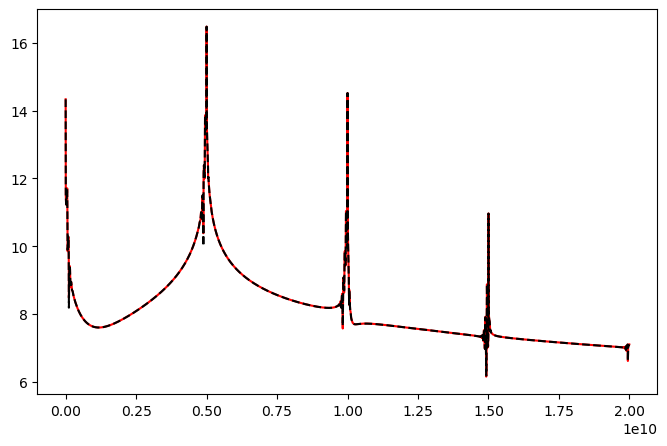

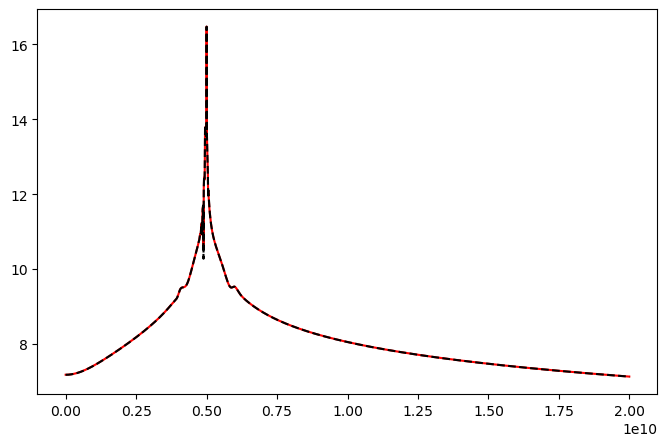

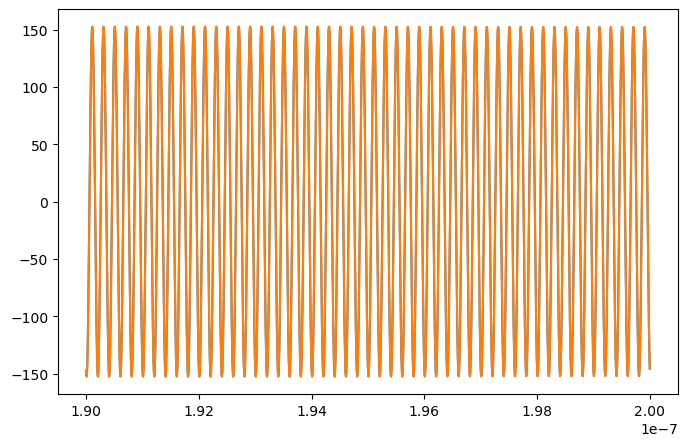

In [52]:
from scipy import signal 
sos = signal.butter(12, [4e9,6e9], 'bandpass', fs=len(tlist)/tlist[-1], output='sos')
freq = np.linspace(0,len(tlist)/tlist[-1],len(tlist))
idx = 4000

fft_x1 = np.fft.fft(x1)
fft_x2 = np.fft.fft(x2)

x1_filtered = signal.sosfilt(sos, x1)
x2_filtered = signal.sosfilt(sos, x2)

fft_x1_filtered = np.fft.fft(x1_filtered)
fft_x2_filtered = np.fft.fft(x2_filtered)

fig, ax = plt.subplots(figsize=(8,5))

plt.plot(freq[0:idx], np.log(np.abs(fft_x1[0:idx])),'r')
plt.plot(freq[0:idx], np.log(np.abs(fft_x2[0:idx])),'k--')

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(freq[0:idx], np.log(np.abs(fft_x1_filtered[0:idx])),'r')
plt.plot(freq[0:idx], np.log(np.abs(fft_x2_filtered[0:idx])),'k--')

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(tlist[-10000:], x2_filtered[-10000:])
plt.plot(tlist[-10000:], x1_filtered[-10000:])


# Semi-classical

(-77.76180372621987, 77.76180372621987)

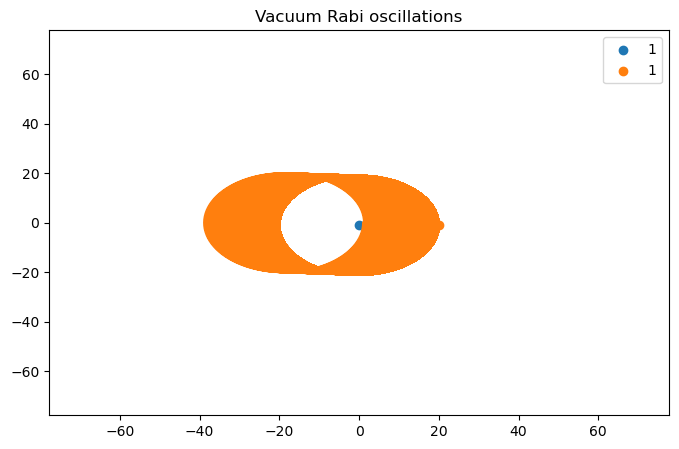

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

# This attempts to demonstrate appearance of sideband frequencies for 
# weak parametric drive.

def semiclassical(m, w_s, w_1, w_2, epsilon_1, epsilon_2, phi_1, phi_2, kappa, g3, g4, amp_on):

    def N_1D_solve():

        N = 1 

        t = np.linspace(0,2e-7,200000)

        x = np.zeros([len(t),N],dtype=np.complex128)
    
        dt = t[1] - t[0]

        x0 = np.array([1])*1.0

        x[0,:] = x0

        def f(x,t):

            s = x[0]

            dsdt = -1j*w_s*s - 1j*epsilon_1*np.exp(-1j*w_1*t) - 1j*amp_on*epsilon_2*np.exp(-1j*w_2*t) - kappa*s

            return np.array([dsdt])

        for i in range(0, len(t)-1):#

            k1 = f(x[i,:], t[i])
            k2 = f(x[i,:] + k1*dt/2, t[i] + dt/2) 
            k3 = f(x[i,:] + k2*dt/2, t[i] + dt/2) 
            k4 = f(x[i,:] + k3*dt, t[i] + dt) 

            x[i+1,:] = x[i,:] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

        return t, x
 
    t, traj = N_1D_solve()
    
    traj = traj[:,0]

    I = np.real(traj)
    Q = np.imag(traj)
    
    return t, traj, I, Q

epsilon_1 = 10e6 * 2 * np.pi
epsilon_2 = 100e9 * 2 * np.pi 
w_s  = 2 * np.pi * 5e9 
w_1 = 2 * np.pi * 5.00e9
w_2 = 2 * np.pi * 10.0e9 
phi_1 = 0*np.pi/2 # phase
phi_2 = 0.5*np.pi/2 # phase
kappa = 10e6 * 2 * np.pi           # cavity dissipation rate
m=0.0000000001  # just a value that keeps the sim stable, doesn't affect the quadratures
g3 = 1e6 * 2 * np.pi
g4 = 0e6 * 2 * np.pi

tlist, traj1, I1, Q1 = semiclassical(m, w_s, w_1, w_2, epsilon_1, epsilon_2, phi_1, phi_2, kappa, g3, g4, 0)
tlist, traj2, I2, Q2 = semiclassical(m, w_s, w_1, w_2, epsilon_1, epsilon_2, phi_1, phi_2, kappa, g3, g4, 1)

w_demod = w_1

demod1 = traj1*np.exp(1j*w_demod*tlist)
demod2 = traj2*np.exp(1j*w_demod*tlist)

limits = np.max(np.abs(demod2))*2

fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(np.real(demod1), np.imag(demod1))
ax1.scatter(np.real(demod1[-1]), np.imag(demod1[-1]), label="1")
ax1.plot(np.real(demod2), np.imag(demod2))
ax1.scatter(np.real(demod2[-1]), np.imag(demod2[-1]), label="1")
ax1.legend()
ax1.set_title('Vacuum Rabi oscillations')
ax1.set_xlim([-limits,limits])
ax1.set_ylim([-limits,limits])

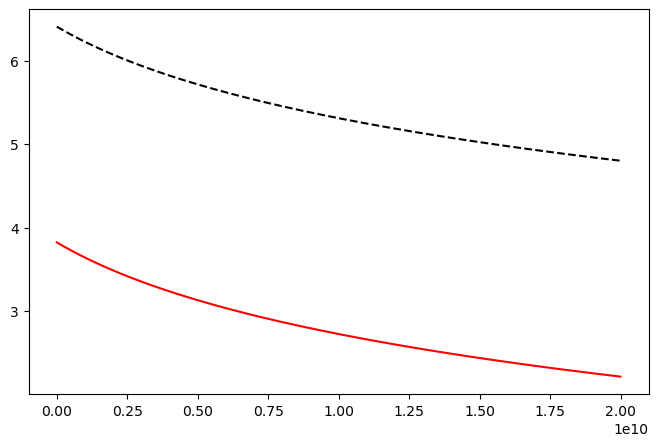

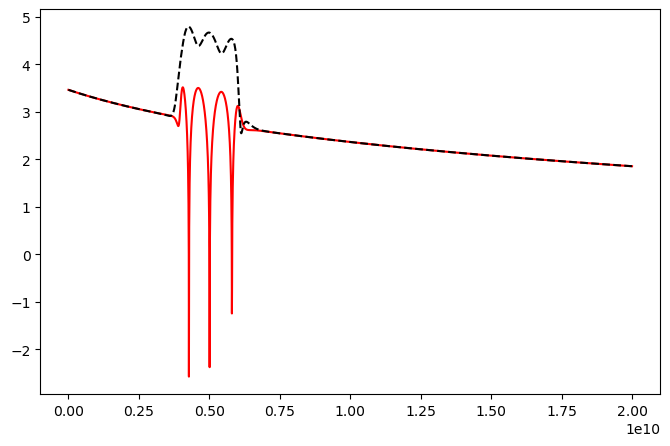

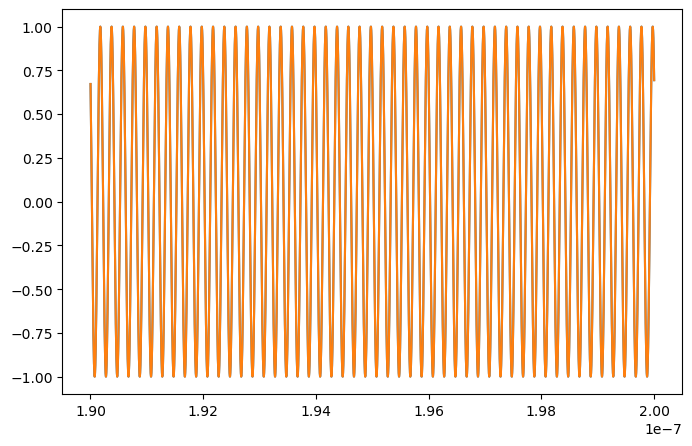

In [82]:
from scipy import signal 
sos = signal.butter(12, [4e9,6e9], 'bandpass', fs=len(tlist)/tlist[-1], output='sos')
freq = np.linspace(0,len(tlist)/tlist[-1],len(tlist))
idx = 4000

fft_traj1 = np.fft.fft(traj1)
fft_traj2 = np.fft.fft(traj2)

traj1_filtered = signal.sosfilt(sos, traj1)
traj2_filtered = signal.sosfilt(sos, traj2)

fft_traj1_filtered = np.fft.fft(traj1_filtered)
fft_traj2_filtered = np.fft.fft(traj2_filtered)

fig, ax = plt.subplots(figsize=(8,5))

plt.plot(freq[0:idx], np.log(np.abs(fft_traj1[0:idx])),'r')
plt.plot(freq[0:idx], np.log(np.abs(fft_traj2[0:idx])),'k--')

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(freq[0:idx], np.log(np.abs(fft_traj1_filtered[0:idx])),'r')
plt.plot(freq[0:idx], np.log(np.abs(fft_traj2_filtered[0:idx])),'k--')

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(tlist[-10000:], traj2_filtered[-10000:])
plt.plot(tlist[-10000:], traj1_filtered[-10000:])

w_demod = w_1

demod1 = (traj1_filtered*np.exp(1j*w_demod*tlist))
demod2 = (traj2_filtered*np.exp(1j*w_demod*tlist))

limits = np.max(np.abs(demod1))*2

# fig1, ax1 = plt.subplots(figsize=(8,5))
# fig2, ax2 = plt.subplots(figsize=(8,5))

# ax1.plot(np.real(demod2), np.imag(demod2))
# ax1.scatter(np.real(demod2[-1]), np.imag(demod2[-1]), label="1")
# ax1.legend()
# ax1.set_title('Vacuum Rabi oscillations')
# ax1.set_xlim([-limits,limits])
# ax1.set_ylim([-limits,limits])

In [79]:
traj2_filtered

array([3.60845284e-27+0.00000000e+00j, 8.97142479e-26-2.37815210e-27j,
       1.11629731e-24-6.15601546e-26j, ...,
       7.37729814e-01-6.75091464e-01j, 7.16160483e-01-6.97931084e-01j,
       6.93884384e-01-7.20081918e-01j])